# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source:** [Rebrickable](https://rebrickable.com/downloads/)

<img src="assets/bricks.jpg" style="display: block; margin: auto;">

# Import Statements

In [1]:
import pandas as pd

# Data Exploration

**1**: How many different colours does the LEGO company produce?

In [2]:
colors=pd.read_csv('data/colors.csv')

In [3]:
colors["name"].nunique()

135

**2**: What is the number of transparent colours versus the number of opaque colours?

In [4]:
df=colors.is_trans.value_counts()
print(f"Transparent={df.t} and Opaque={df.f}")

Transparent=28 and Opaque=107


**<h3>Understanding LEGO Themes vs. LEGO Sets</h3>**

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="assets/lego_themes.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src='assets/lego_sets.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [5]:
sets=pd.read_csv('data/sets.csv')

In [6]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [7]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**3**: In which year were the first LEGO sets released and what were these sets called?

In [8]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


**4**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [9]:
sets[sets["year"] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**5**: What are the top 5 LEGO sets with the most number of parts.?

In [10]:
sets.sort_values('num_parts',ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**6**: What is the number of LEGO sets released year-on-year? How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [11]:
sets_per_year = sets.groupby("year")["set_num"].count().reset_index()
sets_per_year.head()

,year,set_num
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,28


In [12]:
sets_1955 = sets_per_year[sets_per_year["year"] == 1955]["set_num"].values[0]
sets_2019 = sets_per_year[sets_per_year["year"] == 2019]["set_num"].values[0]
print(f"LEGO sets released in 1955: {sets_1955}\nLEGO sets released in 2019: {sets_2019}")

LEGO sets released in 1955: 28
LEGO sets released in 2019: 840


**7**: To plot the number of LEGO releases on a line chart using Matplotlib, we will have to exclude some data from our chart using the slicing techniques to avoid plotting the last two years because the .csv file is from late 2020

In [13]:
import matplotlib.pyplot as plt

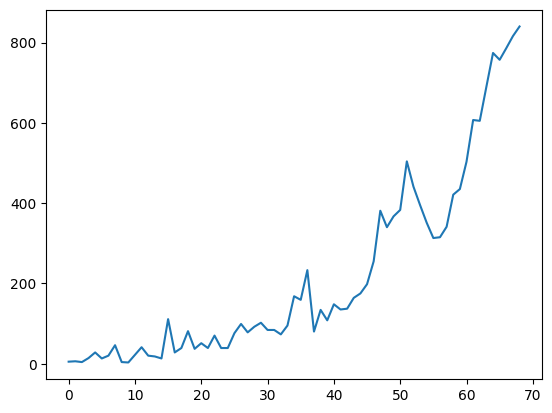

In [14]:
plt.plot(sets_per_year.index[:-2], sets_per_year.set_num[:-2])

### Aggregate Data with the Python .agg() Function

**8**: Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [15]:
themes_per_year = sets.groupby("year").agg({"theme_id": "nunique"}).reset_index()
themes_per_year

,year,theme_id
0,1949,2
1,1950,1
2,1953,2
3,1954,2
4,1955,4
...,...,...
66,2017,89
67,2018,93
68,2019,78
69,2020,82


**9**: Let's plot the number of themes released by year on a line chart.

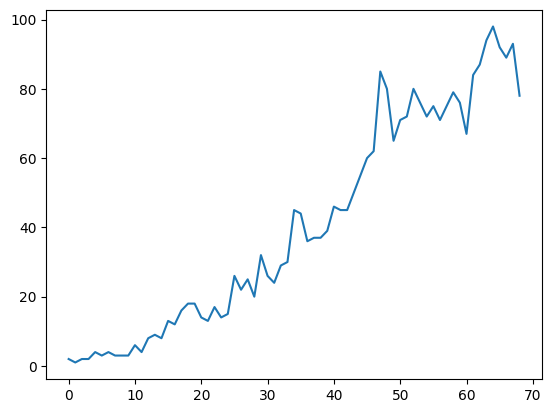

In [16]:
plt.plot(themes_per_year.index[:-2], themes_per_year.theme_id[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number Of Themes')

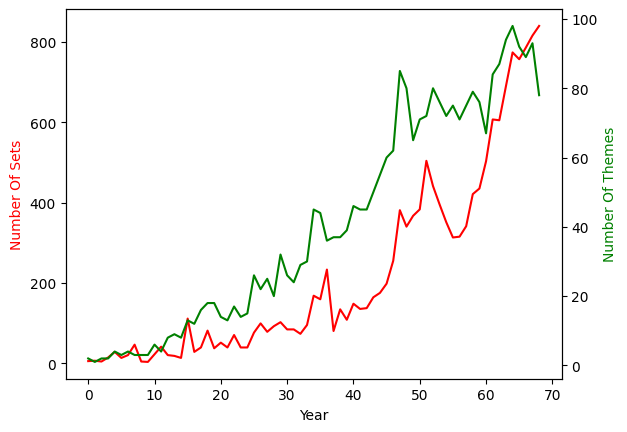

In [17]:
ax1=plt.gca()
ax2=ax1.twinx()

ax1.plot(sets_per_year.index[:-2], sets_per_year.set_num[:-2],color='red')
ax2.plot(themes_per_year.index[:-2], themes_per_year.theme_id[:-2],color='green')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number Of Sets',color='red')
ax2.set_ylabel('Number Of Themes',color='green')

**10**: How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [18]:
parts_per_set = sets.groupby("year").agg({'num_parts': pd.Series.mean}).reset_index()
parts_per_set

,year,num_parts
0,1949,99.600000
1,1950,1.000000
2,1953,13.500000
3,1954,12.357143
4,1955,36.607143
...,...,...
66,2017,221.840967
67,2018,213.618873
68,2019,207.510714
69,2020,259.732938


In [19]:
parts_per_set[ (parts_per_set['year'] == 1954) | (parts_per_set['year'] == 2017) ]

,year,num_parts
3,1954,12.357143
66,2017,221.840967


### Scatter Plots in Matplotlib

**11**: Has the size and complexity of LEGO sets increased over time based on the number of parts? to answer this question we will plot the average number of parts over time using a Matplotlib scatter plot.

Text(0.5, 1.0, 'the average number of parts over time')

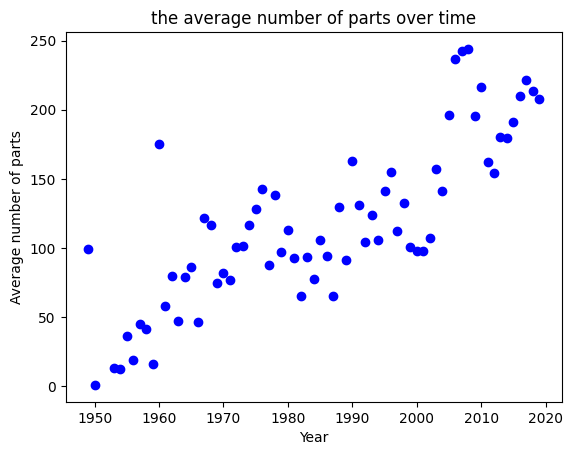

In [20]:
plt.scatter(parts_per_set['year'][:-2],parts_per_set['num_parts'][:-2], color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Average number of parts')
plt.title('the average number of parts over time')


### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

<img src='assets/rebrickable_schema.png' style="display: block; margin: auto;">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**12**: How many <code>id</code>s correspond to 'Star Wars' in the themes.csv? Now we will use these <code>id</code>s and find the corresponding sets in the sets.csv

<img src='assets/starwars.png' style="display: block; margin: auto;">

In [21]:
theme=pd.read_csv('data/themes.csv')

In [22]:
StarWorsID=theme[ theme['name']== 'Star Wars']['id'].tolist()
StarWorsID

[18, 158, 209, 261]

### Merging (i.e., Combining) DataFrames based on a Key


In [23]:
starwors_theme = pd.DataFrame()

for id in StarWorsID:
    df = sets[sets['theme_id'] == id][['name', 'theme_id']].dropna().reset_index(drop=True)
    starwors_theme = pd.concat([starwors_theme, df], ignore_index=True)

starwors_theme

,name,theme_id
0,R2-D2 / C-3PO Droid Collectors Set,18
1,Pit Droid,18
2,Battle Droid,18
3,Destroyer Droid,18
4,C-3PO,18
...,...,...
771,Star Wars Advent Calendar 2020,209
772,Star Wars Advent Calendar 2011,209
773,Star Wars Advent Calendar 2012,209
774,Droid Developer Kit,261


**<h1 style="color: red; text-align: center;">THE END</h1>**